In [37]:
%matplotlib inline
import glob
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [38]:
file_paths = glob.glob("./data2/*")
print(file_paths)

['./data2\\20200402_not_seating.csv']


In [41]:
category =np.empty((0,1), float)
rssi =np.empty((0,100), float)

for file in file_paths:
    d = np.loadtxt(file, delimiter=',')
    c, r = np.hsplit(d, [1])
    
    #100要素毎のRSSIデータを作成する
    #最後のindexは100要素に満たない可能性があるため削除
    reshape_idx = int(r.size / 100)
    reshape_idx = reshape_idx * 100
    r = r[0:reshape_idx].reshape([-1,100])  
    rssi = np.concatenate([rssi, r], axis=0)

    #categoryデータはRSSIデータの分割数だけ追加する
    for i in range(r.shape[0]):
        category = np.concatenate([category, [c]], axis=0)
        pass    
#print(rssi)
#print(category)

rssi = rssi * (-1) / 128
print("rssi array shape : ", rssi.shape)
#print(rssi)
category = tf.keras.utils.to_categorical(category, 2)
print("category array shape : ", category.shape)
#print(category)

rssi_train, rssi_test, category_train, category_test = train_test_split(rssi, category, test_size=0.2)
print("rssi training array shape : ", rssi_train.shape)
#print(rssi_train)
print("category training array shape : ", category_train.shape)
#print(category_train)
print("rssi test array shape : ", rssi_test.shape)
print("category test array shape : ", category_test.shape)

rssi array shape :  (200, 100)
category array shape :  (200, 2)
rssi training array shape :  (160, 100)
category training array shape :  (160, 2)
rssi test array shape :  (40, 100)
category test array shape :  (40, 2)


In [4]:
# モデルを作成
model = models.Sequential()
model.add(layers.Dense(128, input_shape=(100, ), activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dropout(0.1))
model.add(layers.Dense(2, activation='softmax'))

# サマリーを出力
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               12928     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 130       
Total params: 87,234
Trainable params: 87,234
Non-trainable params: 0
_________________________________________________________________


Train on 4682 samples, validate on 1171 samples
Epoch 1/256
4682/4682 [==============================] - 1s 167us/sample - loss: 0.6648 - accuracy: 0.6254 - val_loss: 0.6638 - val_accuracy: 0.6302
Epoch 2/256
4682/4682 [==============================] - 0s 29us/sample - loss: 0.6590 - accuracy: 0.6382 - val_loss: 0.6642 - val_accuracy: 0.6302
Epoch 3/256
4682/4682 [==============================] - 0s 25us/sample - loss: 0.6584 - accuracy: 0.6382 - val_loss: 0.6640 - val_accuracy: 0.6302
Epoch 4/256
4682/4682 [==============================] - 0s 30us/sample - loss: 0.6596 - accuracy: 0.6382 - val_loss: 0.6635 - val_accuracy: 0.6302
Epoch 5/256
4682/4682 [==============================] - 0s 25us/sample - loss: 0.6578 - accuracy: 0.6382 - val_loss: 0.6608 - val_accuracy: 0.6302
Epoch 6/256
4682/4682 [==============================] - 0s 25us/sample - loss: 0.6568 - accuracy: 0.6382 - val_loss: 0.6604 - val_accuracy: 0.6302
Epoch 7/256
4682/4682 [==============================] - 0s 25u

Epoch 56/256
4682/4682 [==============================] - 0s 26us/sample - loss: 0.4993 - accuracy: 0.7734 - val_loss: 0.5635 - val_accuracy: 0.7319
Epoch 57/256
4682/4682 [==============================] - 0s 25us/sample - loss: 0.4966 - accuracy: 0.7755 - val_loss: 0.4939 - val_accuracy: 0.7728
Epoch 58/256
4682/4682 [==============================] - 0s 25us/sample - loss: 0.5027 - accuracy: 0.7708 - val_loss: 0.5077 - val_accuracy: 0.7669
Epoch 59/256
4682/4682 [==============================] - 0s 28us/sample - loss: 0.4849 - accuracy: 0.7860 - val_loss: 0.5102 - val_accuracy: 0.7669
Epoch 60/256
4682/4682 [==============================] - 0s 25us/sample - loss: 0.4951 - accuracy: 0.7785 - val_loss: 0.5544 - val_accuracy: 0.7387
Epoch 61/256
4682/4682 [==============================] - 0s 25us/sample - loss: 0.5291 - accuracy: 0.7518 - val_loss: 0.4979 - val_accuracy: 0.7720
Epoch 62/256
4682/4682 [==============================] - 0s 28us/sample - loss: 0.4881 - accuracy: 0.7841

Epoch 111/256
4682/4682 [==============================] - 0s 28us/sample - loss: 0.4934 - accuracy: 0.7783 - val_loss: 0.4920 - val_accuracy: 0.7771
Epoch 112/256
4682/4682 [==============================] - 0s 24us/sample - loss: 0.4733 - accuracy: 0.7915 - val_loss: 0.4903 - val_accuracy: 0.7771
Epoch 113/256
4682/4682 [==============================] - 0s 28us/sample - loss: 0.4754 - accuracy: 0.7909 - val_loss: 0.5734 - val_accuracy: 0.7216
Epoch 114/256
4682/4682 [==============================] - 0s 34us/sample - loss: 0.5020 - accuracy: 0.7747 - val_loss: 0.4986 - val_accuracy: 0.7746
Epoch 115/256
4682/4682 [==============================] - 0s 32us/sample - loss: 0.4847 - accuracy: 0.7868 - val_loss: 0.4865 - val_accuracy: 0.7728
Epoch 116/256
4682/4682 [==============================] - 0s 28us/sample - loss: 0.4885 - accuracy: 0.7813 - val_loss: 0.5064 - val_accuracy: 0.7711
Epoch 117/256
4682/4682 [==============================] - 0s 25us/sample - loss: 0.4788 - accuracy:

Epoch 220/256
4682/4682 [==============================] - 0s 25us/sample - loss: 0.4715 - accuracy: 0.7928 - val_loss: 0.5307 - val_accuracy: 0.7566
Epoch 221/256
4682/4682 [==============================] - 0s 25us/sample - loss: 0.4670 - accuracy: 0.7971 - val_loss: 0.5059 - val_accuracy: 0.7720
Epoch 222/256
4682/4682 [==============================] - 0s 29us/sample - loss: 0.4610 - accuracy: 0.7990 - val_loss: 0.4841 - val_accuracy: 0.7831
Epoch 223/256
4682/4682 [==============================] - 0s 25us/sample - loss: 0.4582 - accuracy: 0.8035 - val_loss: 0.5210 - val_accuracy: 0.7609
Epoch 224/256
4682/4682 [==============================] - 0s 25us/sample - loss: 0.4821 - accuracy: 0.7879 - val_loss: 0.5282 - val_accuracy: 0.7711
Epoch 225/256
4682/4682 [==============================] - 0s 28us/sample - loss: 0.4812 - accuracy: 0.7875 - val_loss: 0.4885 - val_accuracy: 0.7814
Epoch 226/256
4682/4682 [==============================] - 0s 25us/sample - loss: 0.4614 - accuracy:

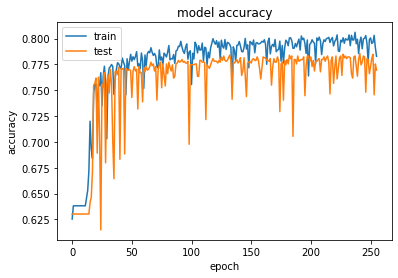

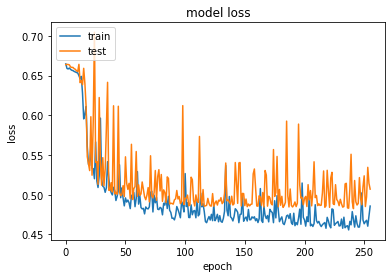

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

training = model.fit(rssi_train, category_train,
                    batch_size=128,
                    epochs=256,
                    #verbose=1,
                    validation_data=(rssi_test, category_test))

#正答率
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [6]:
model.save('model/seating_detection_algorithm.h5', save_format='h5')

In [7]:
import tensorflow as tf
from tensorflow.keras import models
import numpy as np

model = models.load_model('model/seating_detection_algorithm.h5')

x = np.loadtxt("./data/20200319_seating.csv", delimiter=',')
#print("x array shape : ", x.shape)
#print(x)

x = x[0]
#print("x array shape : ", x.shape)
#print(x)
x = np.delete(x, 0)
#print("x array shape : ", x.shape)
#print(x)
x = x.reshape(1,100)
#print("x array shape : ", x.shape)
#print(x)
x = x * (-1) / 128
#print("x array shape : ", x.shape)
#print(x)

print(np.argmax(model.predict(x)))
#l = model.predict(x)

1
